In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/dataset80-20/training",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/dataset80-20/testing",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 12826 files belonging to 2 classes.
Found 3206 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
class_indices = {class_name: index for index, class_name in enumerate(class_names)}

print("Class Names:", class_names)
print("Number of Classes:", num_classes)
print("Class Indices:", class_indices)

Class Names: ['cnv', 'normal']
Number of Classes: 2
Class Indices: {'cnv': 0, 'normal': 1}


In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/dataset80-20/training')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['normal', 'cnv']
Types of classes labels found:  2


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=validation_ds)

Epoch 1/100
401/401 [==============================] - 3706s 9s/step - loss: 2.0391 - accuracy: 0.6533 - val_loss: 1.8925 - val_accuracy: 0.5221
Epoch 2/100
401/401 [==============================] - 63s 155ms/step - loss: 0.3205 - accuracy: 0.8945 - val_loss: 0.2950 - val_accuracy: 0.9270
Epoch 3/100
401/401 [==============================] - 74s 184ms/step - loss: 0.1460 - accuracy: 0.9561 - val_loss: 0.1592 - val_accuracy: 0.9454
Epoch 4/100
401/401 [==============================] - 74s 183ms/step - loss: 0.1041 - accuracy: 0.9693 - val_loss: 2.0043 - val_accuracy: 0.6404
Epoch 5/100
401/401 [==============================] - 74s 182ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.9914 - val_accuracy: 0.7199
Epoch 6/100
401/401 [==============================] - 74s 183ms/step - loss: 0.0653 - accuracy: 0.9802 - val_loss: 0.1700 - val_accuracy: 0.9716
Epoch 7/100
401/401 [==============================] - 76s 187ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.1191 - 

In [ ]:
model.save('/content/drive/MyDrive/models 80-20/model-cnn80-20-100ep.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


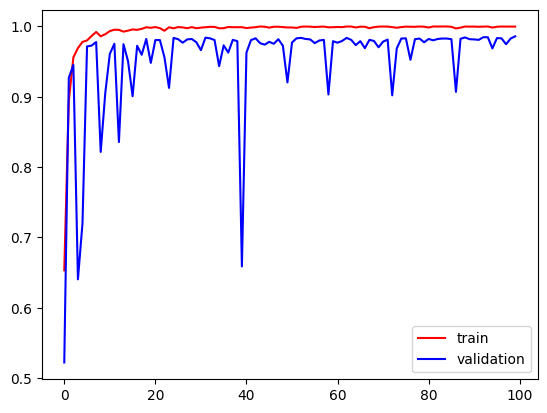

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

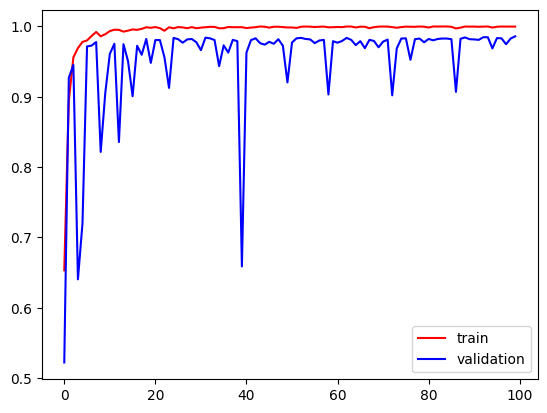

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

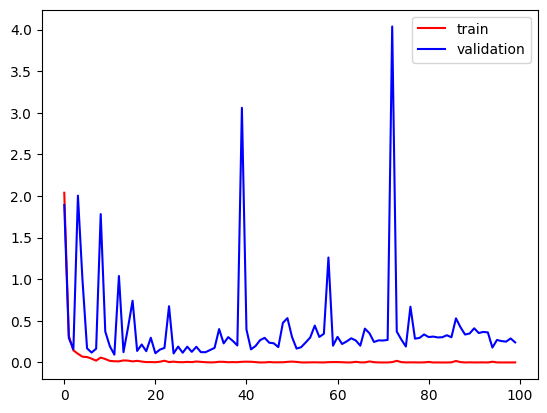

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

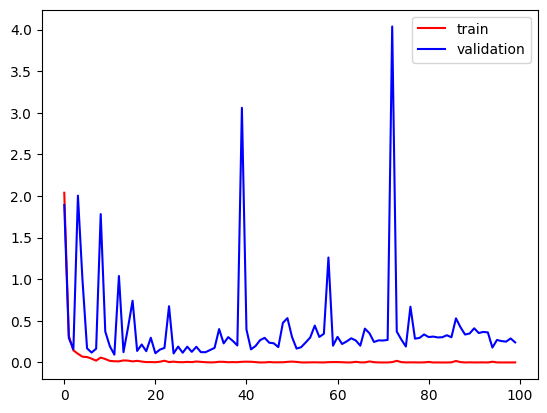

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
#test_img = cv2.imread("/content/drive/MyDrive/normal sample/NORMAL-2131138-13.jpeg")
test_img = cv2.imread("/content/drive/MyDrive/testing/normal test/NORMAL-101880-1.jpeg")

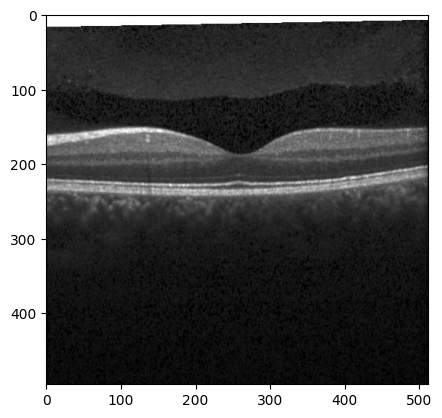

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(496, 512, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

TypeError: ignored

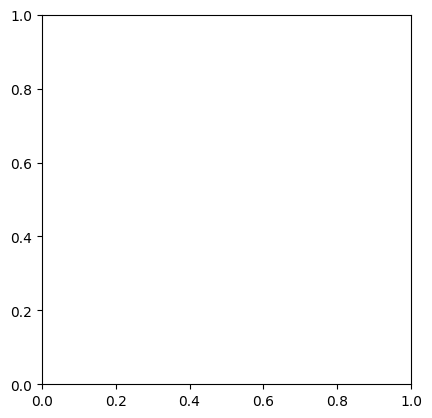

In [ ]:
plt.imshow(test_input)

In [ ]:
model.predict(test_input)

In [ ]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/models 80-20/model-cnn80-20-100ep.h5'
model = load_model(model_path)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

test_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/testing",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

test_ds = test_ds.map(process)
# Make predictions on the validation dataset
predictions = model.predict(test_ds)
predicted_labels = np.round(predictions).flatten()  # Assuming binary classification

# Get the true labels from the validation dataset
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)
confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["CNV", "NORMAL"], yticklabels=["CNV", "NORMAL"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# You can also print a classification report for more detailed metrics
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the test image
test_img = cv2.imread("/content/drive/MyDrive/testing/normal test/NORMAL-101880-1.jpeg")

# Resize the test image to (256, 256)
test_img_resized = cv2.resize(test_img, (256, 256))

# Display the original and resized images side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Resized Image")
plt.imshow(cv2.cvtColor(test_img_resized, cv2.COLOR_BGR2RGB))

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Generator for your test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/testing',
    target_size=(256, 256),
    batch_size=32,  # Adjust batch size as needed
    class_mode='binary',  # Assuming binary classification
    shuffle=False  # Important: Ensure that the data generator doesn't shuffle the data
)

# Predict probabilities for the test dataset
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# Assuming you have binary labels (0 or 1)
true_labels = test_generator.classes

# Calculate the ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()
